# Implmentation of a CNN for Fashion MNIST

## Import Libraries

In [44]:
import numpy
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.utils import np_utils
from dotdict import dotdict
from random import randint
## Pick random input image and display it
import matplotlib.pyplot as plt
import numpy as np


## Setup W&B

In [6]:
from wandb.keras import WandbCallback
import wandb

# Set the notebook name for W&B
%env "WANDB_NOTEBOOK_NAME" "3-Fashion-MNIST-CNN"
wandb.login()


env: "WANDB_NOTEBOOK_NAME"="3-Fashion-MNIST-CNN"


True

## Config Model

In [46]:
config = dotdict.Dict()
config.img_width = 28
config.img_height = 28
config.first_layer_conv_width = 3
config.first_layer_conv_height = 3
config.dense_layer_size = 100
config.epochs = 10

## Load and Explore Data

In [7]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Label:  4


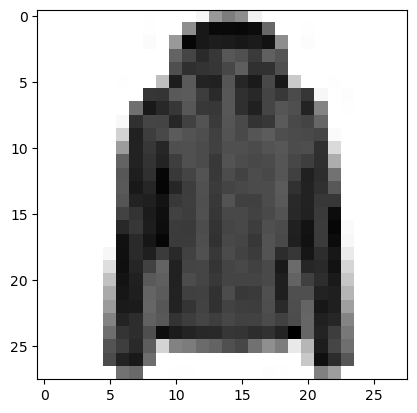

In [26]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Pick a random image
img_index = randint(0, X_train.shape[0])

# Display the image
plt.imshow(X_train[img_index], cmap='Greys')
print("Label: ", y_train[img_index])

In [27]:
X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

In [38]:
# Print random pixel values to check normalization
print(X_train[img_index])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.2509804  0.23921569
  0.         0.         0.         0.         0.31764707 0.40784314
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.21960784 0.6        0.7647059  0.8156863  0.87058824
  0.92156863 0.84313726 0.94509804 0.93333334 0.93333334 0.827451
  0.7764706  0.6        0.24313726 0.         0.         0.00392157
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.61960787 0.85490197 0.84313726 0.7921569  0.7764706  0.7647059
  0.827451   0.9137255  0.94509804 0.85490197 0.76862746 0.7882353
  0.8039216  0.84705883 0.84313726 0.6666667  0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.4627451
  0.8117647  0.72156

## Reshape if GreyScale

In [40]:
X_train = X_train.reshape(
    X_train.shape[0], config.img_width, config.img_height, 1)
X_test = X_test.reshape(
    X_test.shape[0], config.img_width, config.img_height, 1)


In [41]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


## One Hot Encode Labels

In [42]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [43]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


## Define Model and Init W&B

In [47]:
# Init W&B
run = wandb.init(config=config)

# build model
model = Sequential()
model.add(Conv2D(32,
                 (config.first_layer_conv_width, config.first_layer_conv_height),
                 input_shape=(28, 28, 1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(config.dense_layer_size, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


## Check Model Summary

In [48]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                      

## Fit Model

In [49]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=config.epochs,
          callbacks=[WandbCallback(data_type="image")])

run.finish() # Finish the W&B run

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.
wandb: WARNING The data_type argument of wandb.keras.WandbCallback is deprecated and will be removed in a future release. Please use input_type instead.
wandb: WARNING Setting input_type = data_type.


Epoch 1/10


2023-01-31 21:51:53.505828: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-31 21:51:53.709747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.4315 - accuracy: 0.8469

2023-01-31 21:52:13.162566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 20ms/step


2023-01-31 21:52:15.726591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best)... Done. 0.1s


1875/1875 [==============================] - 23s 12ms/step - loss: 0.4315 - accuracy: 0.8469 - val_loss: 0.3260 - val_accuracy: 0.8835
Epoch 2/10
2/2 [==============================] - 0s 3ms/step0s - loss: 0.2967 - accuracy: 0.89


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 22s 12ms/step - loss: 0.2966 - accuracy: 0.8921 - val_loss: 0.2926 - val_accuracy: 0.8952
Epoch 3/10
1665/1875 [=========================>....] - ETA: 2s - loss: 0.2605 - accuracy: 0.9061

wandb: ERROR Error while calling W&B API: Error 1062: Duplicate entry '4cpkujrpqm1p21ypsk5t2e3mgvdm0n0d32n6zjvk7m1jmdsxun8yhq4o8pxuqnvq' for key 'PRIMARY' (<Response [409]>)


2/2 [==============================] - 0s 3ms/step0s - loss: 0.2589 - accuracy: 0.90


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 23s 12ms/step - loss: 0.2589 - accuracy: 0.9068 - val_loss: 0.2670 - val_accuracy: 0.9014
Epoch 4/10
2/2 [==============================] - 0s 4ms/step0s - loss: 0.2329 - accuracy: 0.91


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 27s 14ms/step - loss: 0.2329 - accuracy: 0.9132 - val_loss: 0.2607 - val_accuracy: 0.9042
Epoch 5/10
2/2 [==============================] - 0s 3ms/step0s - loss: 0.2109 - accuracy: 0.92


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 22s 12ms/step - loss: 0.2109 - accuracy: 0.9219 - val_loss: 0.2407 - val_accuracy: 0.9126
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1953 - accuracy: 0.9270 - val_loss: 0.2508 - val_accuracy: 0.9095
Epoch 7/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1791 - accuracy: 0.9326 - val_loss: 0.2437 - val_accuracy: 0.9133
Epoch 8/10
2/2 [==============================] - 0s 3ms/step0s - loss: 0.1663 - accuracy: 0.93


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_215121-cmmmkncx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 23s 12ms/step - loss: 0.1662 - accuracy: 0.9383 - val_loss: 0.2369 - val_accuracy: 0.9163
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1542 - accuracy: 0.9424 - val_loss: 0.2600 - val_accuracy: 0.9107
Epoch 10/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1465 - accuracy: 0.9440 - val_loss: 0.2515 - val_accuracy: 0.9175


accuracy,▁▄▅▆▆▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▃▅▅▇▆▇█▇█
val_loss,█▅▃▃▁▂▂▁▃▂
accuracy,0.94398
best_epoch,7
best_val_loss,0.23694
epoch,9
loss,0.1465
val_accuracy,0.9175


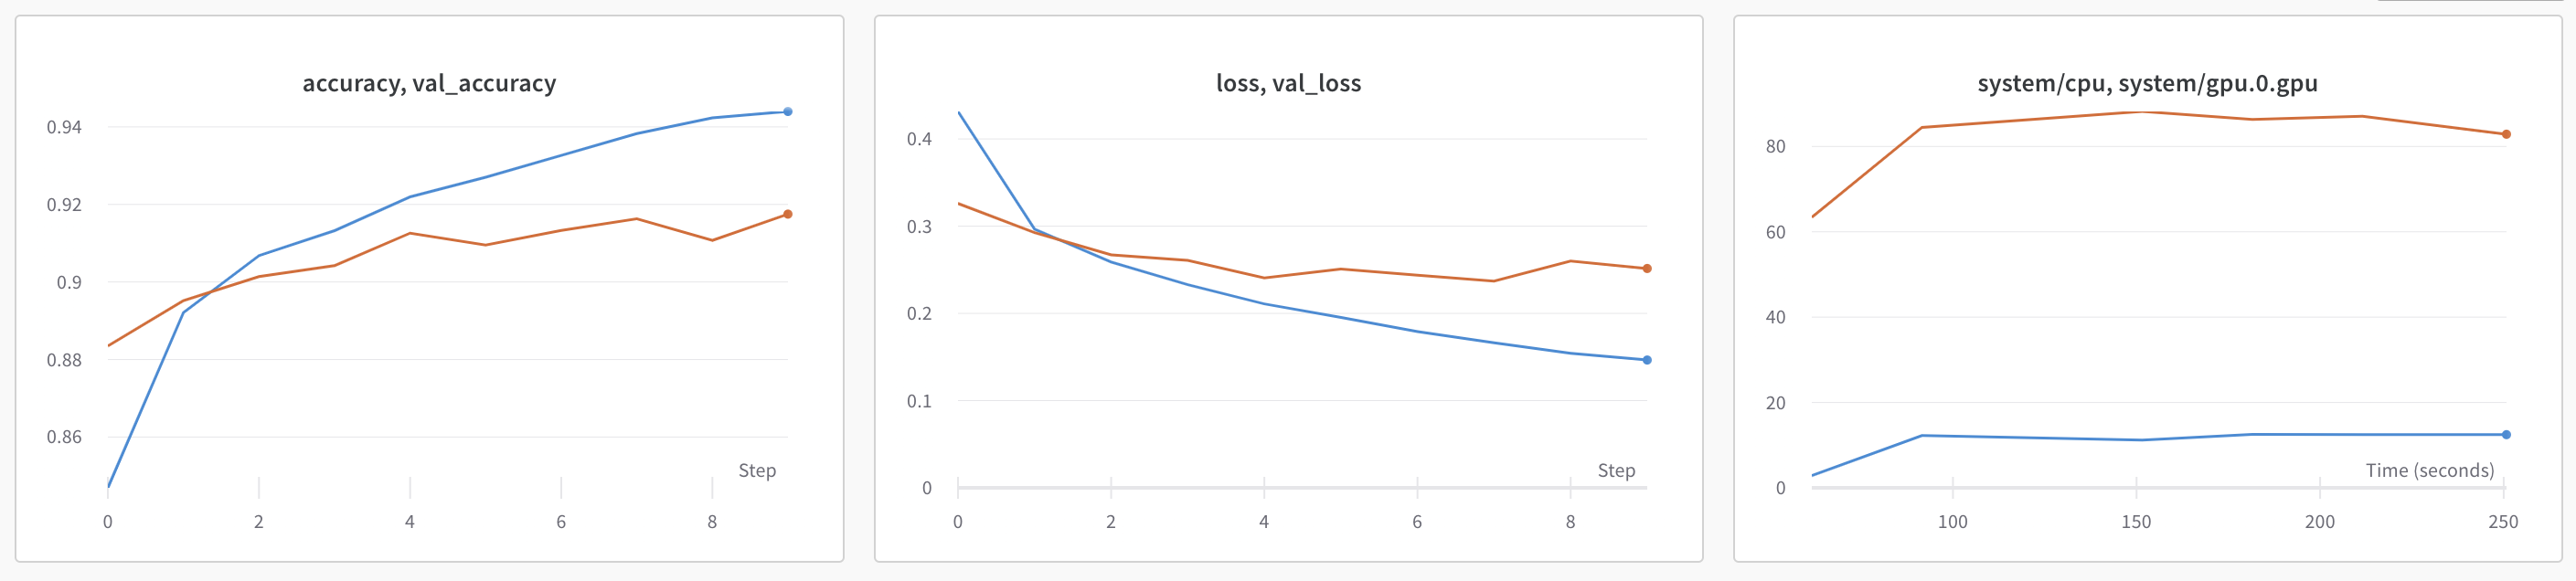

In [54]:
# Init W&B
run = wandb.init(config=config)

# build model
model_deeper = Sequential()
model_deeper.add(Conv2D(48,
                 (config.first_layer_conv_width, config.first_layer_conv_height),
                 input_shape=(28, 28, 1),
                 activation='relu'))
model_deeper.add(MaxPooling2D(pool_size=(2, 2)))
model_deeper.add(Conv2D(96,
                 (config.first_layer_conv_width, config.first_layer_conv_height),
                 input_shape=(13, 13, 1),
                 activation='relu'))
model_deeper.add(MaxPooling2D(pool_size=(2, 2)))
model_deeper.add(Conv2D(80,
                 (config.first_layer_conv_width, config.first_layer_conv_height),
                 input_shape=(5, 5, 1),
                 activation='relu'))
model_deeper.add(Conv2D(96,
                 (config.first_layer_conv_width, config.first_layer_conv_height),
                 input_shape=(5, 5, 1),
                 activation='relu'))
model_deeper.add(Flatten())
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(512, activation='relu'))
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(num_classes, activation='softmax'))


model_deeper.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


In [55]:
model_deeper.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 48)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 96)        41568     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 96)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 80)          69200     
                                                                 
 conv2d_13 (Conv2D)          (None, 1, 1, 96)         

In [56]:
model_deeper.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=config.epochs,
          callbacks=[WandbCallback(data_type="image")])

run.finish()  # Finish the W&B run

Epoch 1/10


2023-01-31 22:09:36.712935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.5731 - accuracy: 0.7851

2023-01-31 22:10:05.448766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 29ms/step


2023-01-31 22:10:08.197131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 33s 17ms/step - loss: 0.5731 - accuracy: 0.7851 - val_loss: 0.3655 - val_accuracy: 0.8671
Epoch 2/10
2/2 [==============================] - 0s 6ms/step0s - loss: 0.3444 - accuracy: 0.87


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 32s 17ms/step - loss: 0.3444 - accuracy: 0.8757 - val_loss: 0.3142 - val_accuracy: 0.8854
Epoch 3/10
2/2 [==============================] - 0s 6ms/step0s - loss: 0.2934 - accuracy: 0.89


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 32s 17ms/step - loss: 0.2934 - accuracy: 0.8943 - val_loss: 0.2963 - val_accuracy: 0.8934
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2642 - accuracy: 0.9049 - val_loss: 0.2976 - val_accuracy: 0.8923
Epoch 5/10
2/2 [==============================] - 0s 4ms/step0s - loss: 0.2397 - accuracy: 0.91


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 32s 17ms/step - loss: 0.2397 - accuracy: 0.9130 - val_loss: 0.2783 - val_accuracy: 0.9054
Epoch 6/10
2/2 [==============================] - 0s 4ms/step0s - loss: 0.2243 - accuracy: 0.91


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 32s 17ms/step - loss: 0.2242 - accuracy: 0.9181 - val_loss: 0.2758 - val_accuracy: 0.9029
Epoch 7/10
2/2 [==============================] - 0s 4ms/step0s - loss: 0.2076 - accuracy: 0.92


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 32s 17ms/step - loss: 0.2076 - accuracy: 0.9245 - val_loss: 0.2716 - val_accuracy: 0.9027
Epoch 8/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1974 - accuracy: 0.9269 - val_loss: 0.2728 - val_accuracy: 0.9041
Epoch 9/10
2/2 [==============================] - 0s 3ms/step0s - loss: 0.1860 - accuracy: 0.93


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best/assets
wandb: Adding directory to artifact (/Users/samgreen/Development/ml/wandb/ml-class-notebooks/wandb/run-20230131_220912-237a7ioq/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 32s 17ms/step - loss: 0.1861 - accuracy: 0.9326 - val_loss: 0.2675 - val_accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1768 - accuracy: 0.9357 - val_loss: 0.2781 - val_accuracy: 0.9056


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▅▅▇▇▇▇█▇
val_loss,█▄▃▃▂▂▁▁▁▂
accuracy,0.93567
best_epoch,8
best_val_loss,0.26753
epoch,9
loss,0.17684
val_accuracy,0.9056


## Deeper Model Evaluation (Dropout at 0.2)
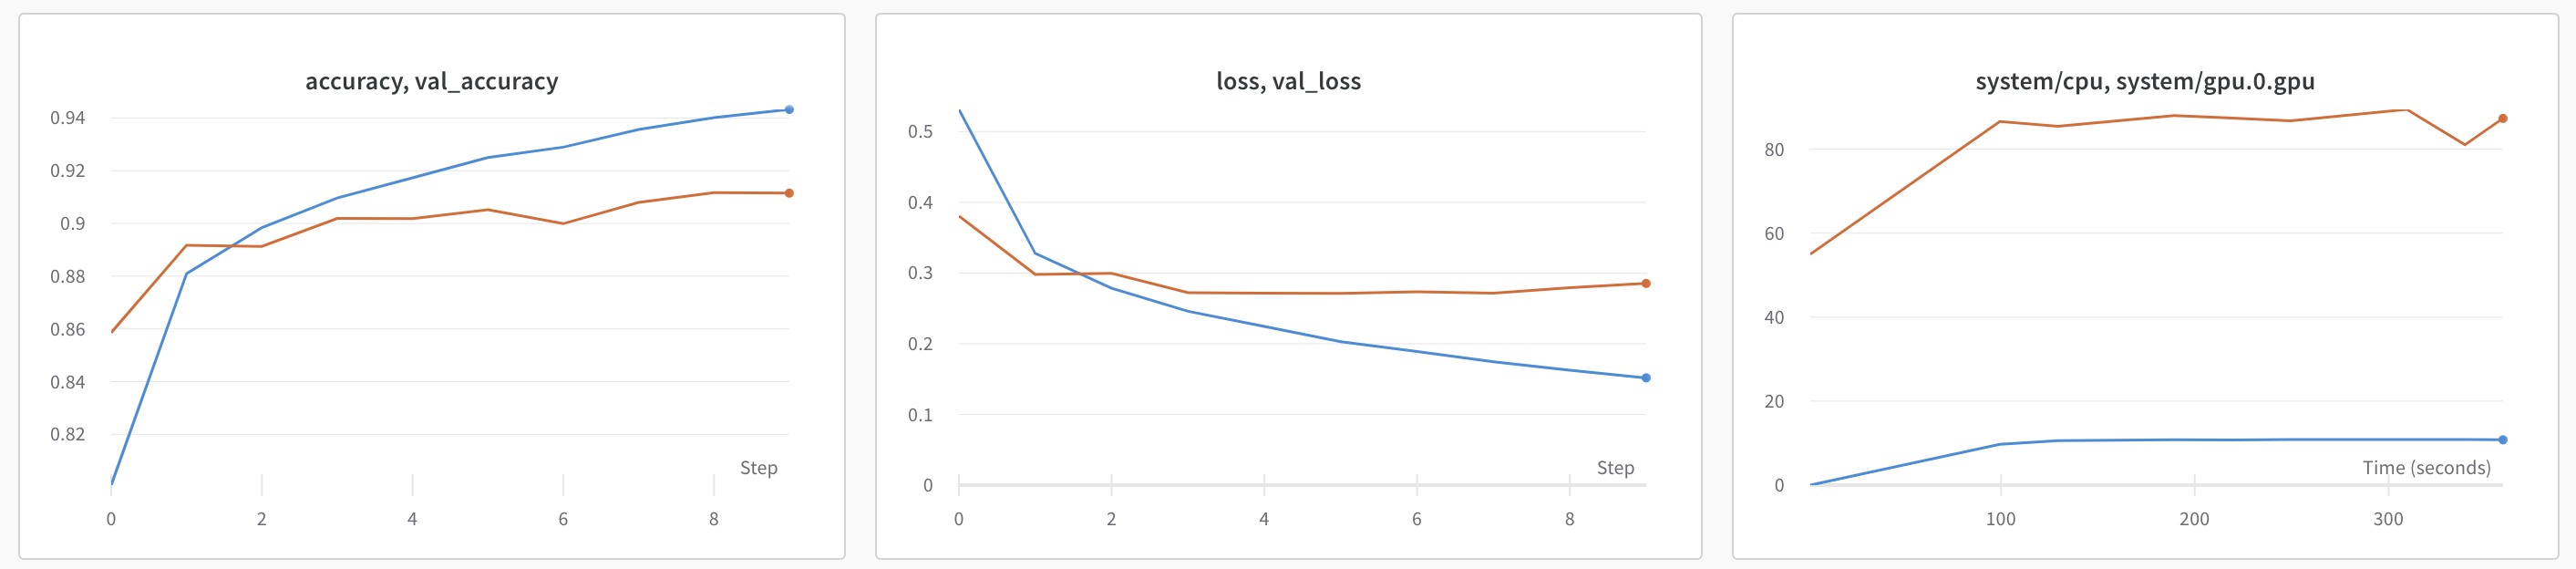

## Deeper Model Evaluation (Dropout at 0.5)

- Lower accuracy after 10 epochs (ie takes longer to train) but also is overfitting
- The simpler NN seems to outperform the deeper NN here

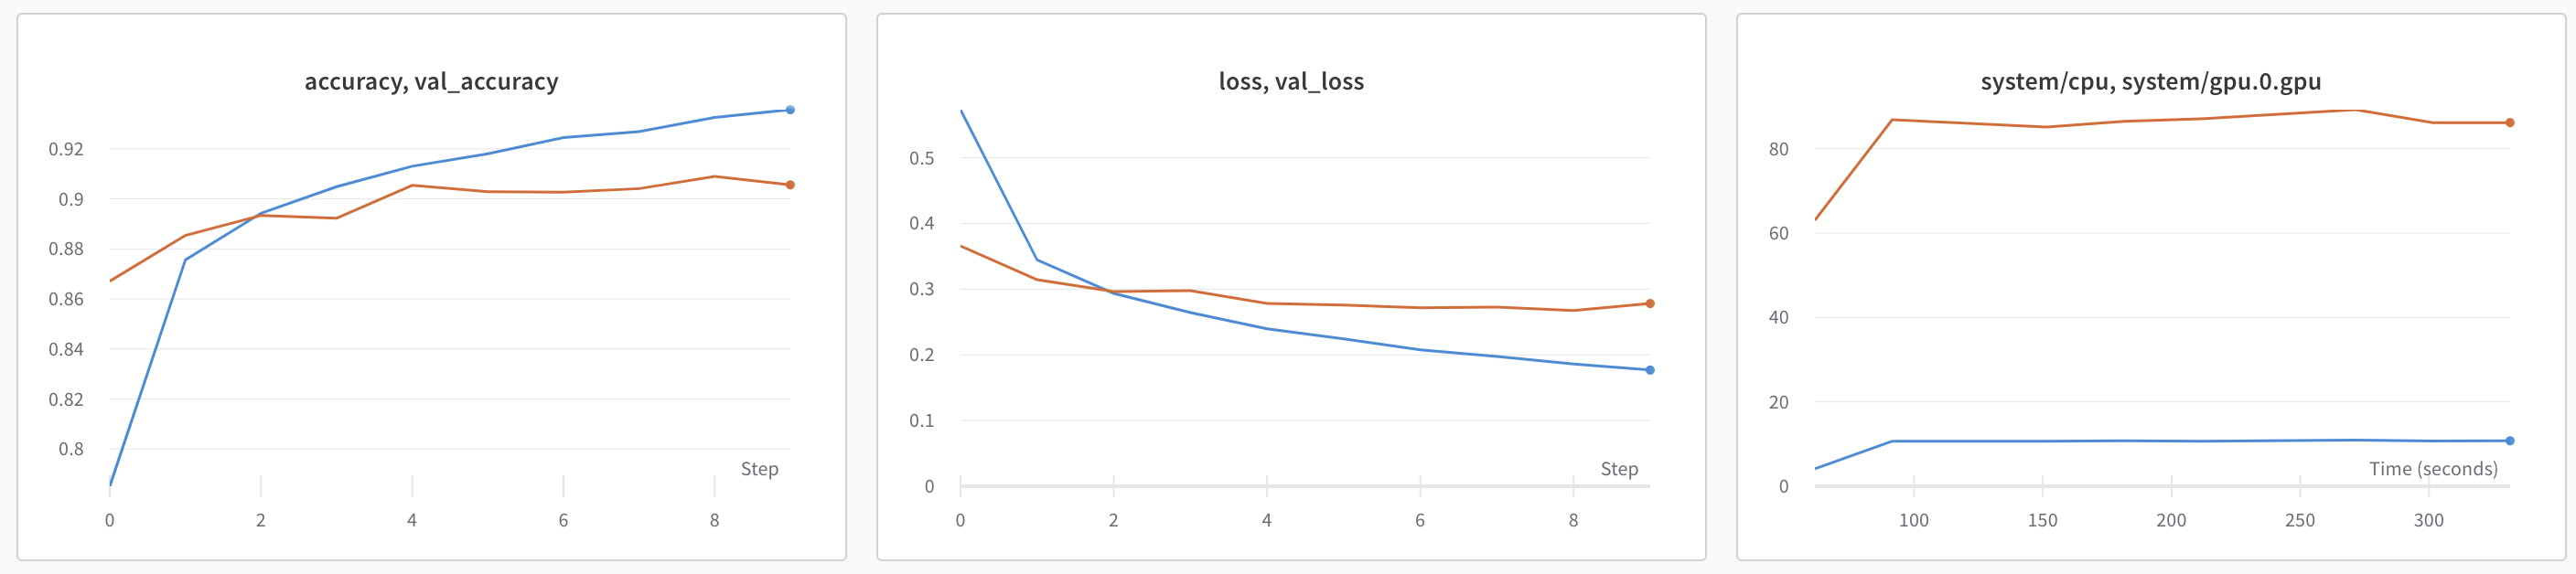